In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Load dataset
df = pd.read_csv('/media/maliciit/Data/Ali/MS Data Scince/Semester 1/4. Machine Learning/AI_ML Project/financial_fraud_detection_dataset.csv')  # Replace with your file path

print(f"Initial shape: {df.shape}")
print(f"Fraud rate: {df['is_fraud'].sum() / len(df) * 100:.2f}%")
print(f"\nMissing values:\n{df.isnull().sum()}")

# ===== 1. HANDLE MISSING VALUES =====
df['fraud_type'].fillna('Unknown', inplace=True)
df['time_since_last_transaction'].fillna(df['time_since_last_transaction'].median(), inplace=True)

# ===== 2. DROP UNNECESSARY COLUMNS =====
df.drop(['transaction_id', 'ip_address', 'device_hash', 'timestamp'], axis=1, inplace=True)

# ===== 3. ENCODE CATEGORICAL FEATURES =====
categorical_cols = ['transaction_type', 'merchant_category', 'location',
                    'device_used', 'payment_channel', 'fraud_type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# ===== 4. SEPARATE FEATURES AND TARGET =====
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

# ===== 5. TRAIN/VAL/TEST SPLIT =====
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"\nTrain: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
print(f"Train fraud rate: {y_train.sum() / len(y_train) * 100:.2f}%")

# ===== 6. NORMALIZE NUMERIC FEATURES =====
numeric_cols = ['amount', 'time_since_last_transaction', 'spending_deviation_score',
                'velocity_score', 'geo_anomaly_score']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ===== 7. SAVE PREPROCESSED DATA =====
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save scaler and encoders
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("\n✓ Preprocessing complete! Files saved.")
print(f"Feature count: {X_train.shape[1]}")

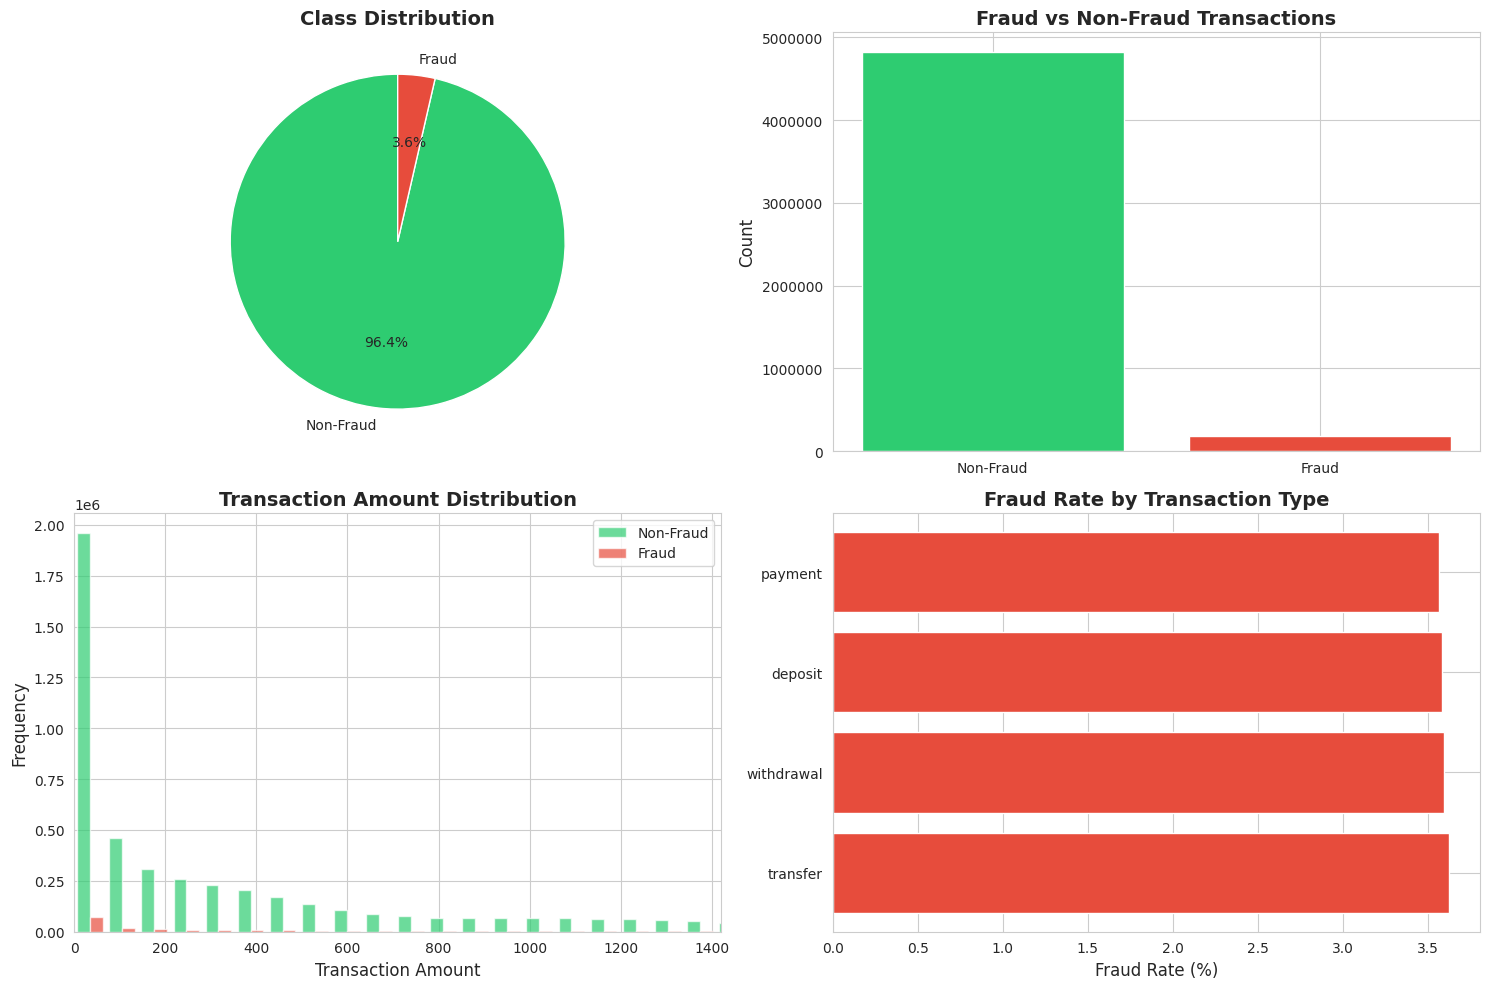

/tmp/ipykernel_21191/2348527546.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df[df['is_fraud']==0][score].dropna(),
/tmp/ipykernel_21191/2348527546.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df[df['is_fraud']==0][score].dropna(),
/tmp/ipykernel_21191/2348527546.py:60: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df[df['is_fraud']==0][score].dropna(),


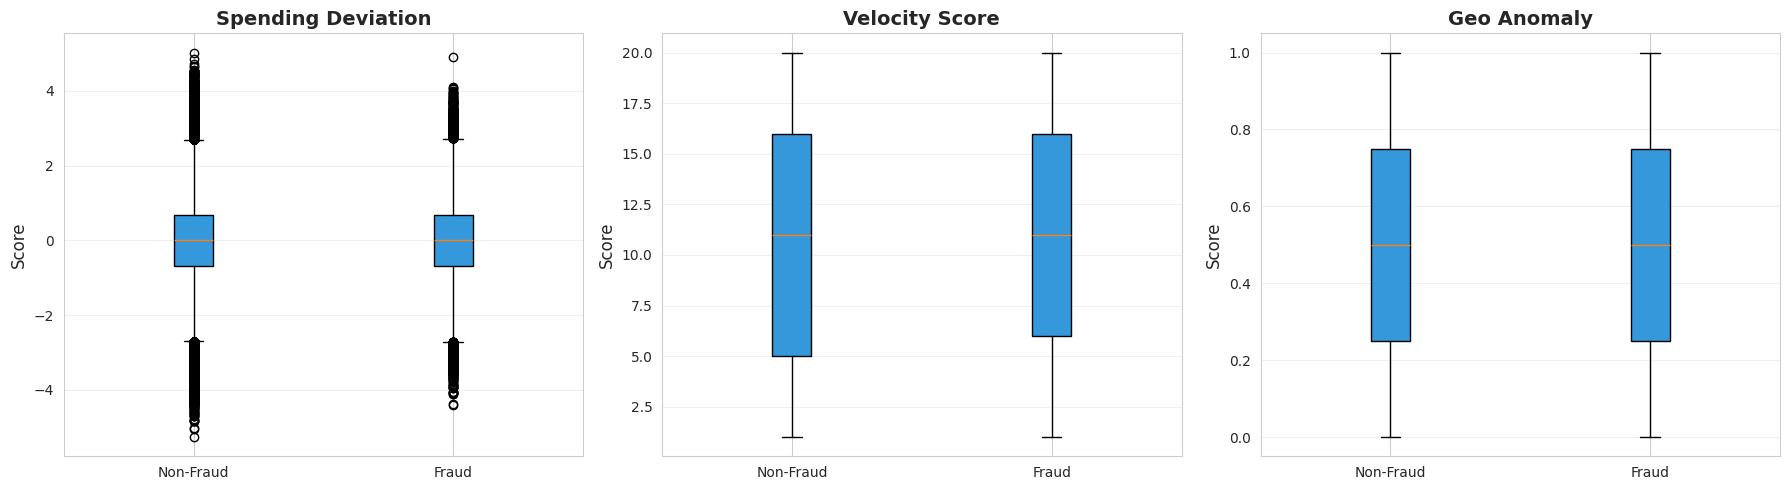

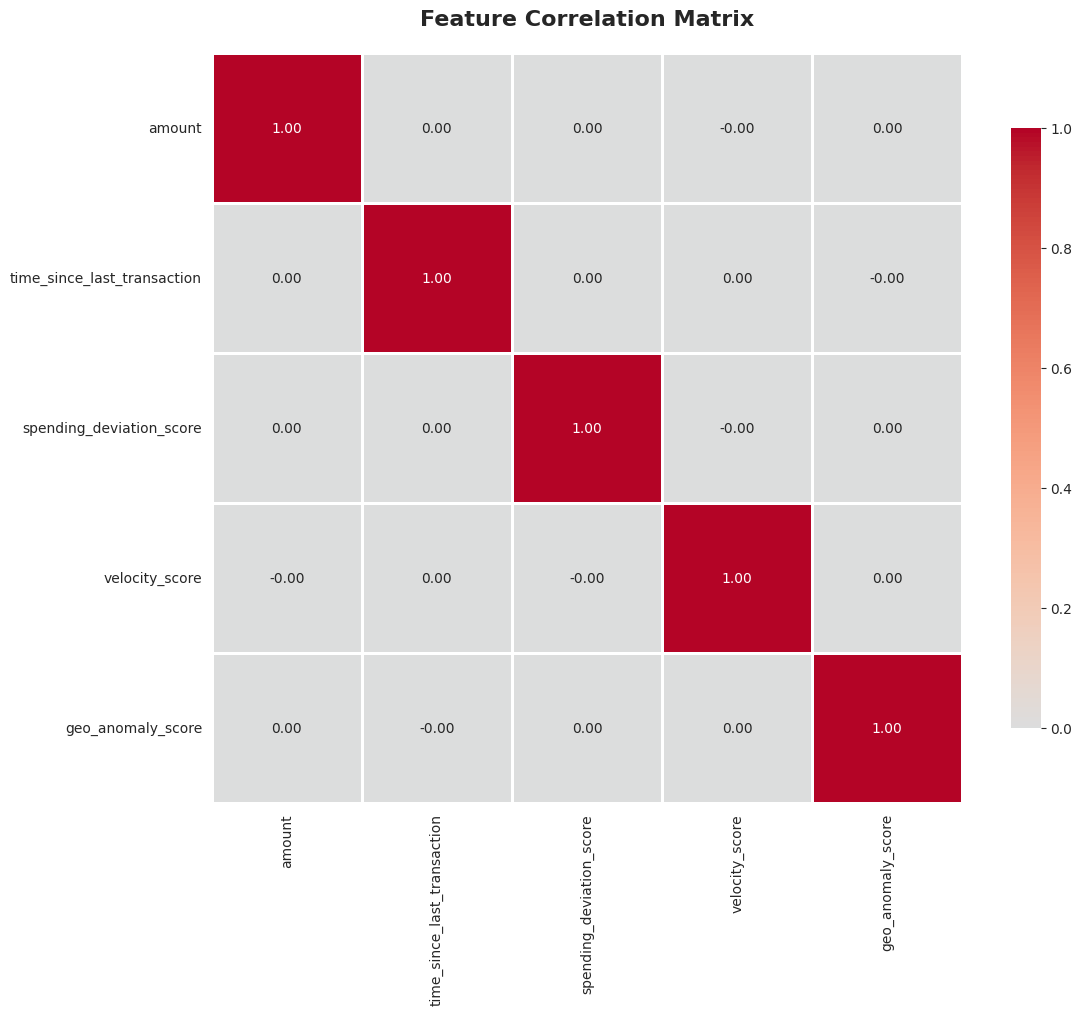


DATASET SUMMARY STATISTICS

Total Transactions: 5,000,000
Fraudulent: 179,553 (3.59%)
Non-Fraudulent: 4,820,447 (96.41%)

Amount Statistics:
  Mean: $358.93
  Median: $138.67
  Fraud Mean: $358.53
  Non-Fraud Mean: $358.95



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load original data (before preprocessing)
df = pd.read_csv('/media/maliciit/Data/Ali/MS Data Scince/Semester 1/4. Machine Learning/AI_ML Project/financial_fraud_detection_dataset.csv')

# ===== 1. CLASS DISTRIBUTION =====
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pie chart
fraud_counts = df['is_fraud'].value_counts()
axes[0, 0].pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%',
               colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0, 0].set_title('Class Distribution', fontsize=14, fontweight='bold')

# Bar chart
axes[0, 1].bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_title('Fraud vs Non-Fraud Transactions', fontsize=14, fontweight='bold')
axes[0, 1].ticklabel_format(style='plain', axis='y')

# ===== 2. AMOUNT DISTRIBUTION =====
fraud_amounts = df[df['is_fraud']==1]['amount']
normal_amounts = df[df['is_fraud']==0]['amount']

axes[1, 0].hist([normal_amounts, fraud_amounts], bins=50, label=['Non-Fraud', 'Fraud'],
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1, 0].set_xlabel('Transaction Amount', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, df['amount'].quantile(0.95))  # Remove outliers for clarity

# ===== 3. FRAUD BY TRANSACTION TYPE =====
fraud_by_type = df.groupby('transaction_type')['is_fraud'].agg(['sum', 'count'])
fraud_by_type['rate'] = (fraud_by_type['sum'] / fraud_by_type['count'] * 100)
fraud_by_type = fraud_by_type.sort_values('rate', ascending=False)

axes[1, 1].barh(fraud_by_type.index, fraud_by_type['rate'], color='#e74c3c')
axes[1, 1].set_xlabel('Fraud Rate (%)', fontsize=12)
axes[1, 1].set_title('Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== 4. RISK SCORES COMPARISON =====
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scores = ['spending_deviation_score', 'velocity_score', 'geo_anomaly_score']
titles = ['Spending Deviation', 'Velocity Score', 'Geo Anomaly']

for idx, (score, title) in enumerate(zip(scores, titles)):
    axes[idx].boxplot([df[df['is_fraud']==0][score].dropna(),
                       df[df['is_fraud']==1][score].dropna()],
                      labels=['Non-Fraud', 'Fraud'],
                      patch_artist=True,
                      boxprops=dict(facecolor='#3498db'))
    axes[idx].set_ylabel('Score', fontsize=12)
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('eda_risk_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== 5. CORRELATION HEATMAP =====
# Prepare numeric data only
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('eda_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== 6. SUMMARY STATISTICS =====
print("\n" + "="*60)
print("DATASET SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Transactions: {len(df):,}")
print(f"Fraudulent: {df['is_fraud'].sum():,} ({df['is_fraud'].mean()*100:.2f}%)")
print(f"Non-Fraudulent: {(df['is_fraud']==0).sum():,} ({(1-df['is_fraud'].mean())*100:.2f}%)")
print(f"\nAmount Statistics:")
print(f"  Mean: ${df['amount'].mean():,.2f}")
print(f"  Median: ${df['amount'].median():,.2f}")
print(f"  Fraud Mean: ${df[df['is_fraud']==1]['amount'].mean():,.2f}")
print(f"  Non-Fraud Mean: ${df[df['is_fraud']==0]['amount'].mean():,.2f}")
print("\n" + "="*60)

In [ ]:
import pandas as pd

y_train = pd.read_csv('y_train.csv')
y_val = pd.read_csv('y_val.csv')
y_test = pd.read_csv('y_test.csv')

print(f"Train fraud rate: {y_train['is_fraud'].mean()*100:.2f}%")
print(f"Val fraud rate: {y_val['is_fraud'].mean()*100:.2f}%")
print(f"Test fraud rate: {y_test['is_fraud'].mean()*100:.2f}%")

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

# ===== 1. CUSTOM DATASET =====
class FraudDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ===== 2. NEURAL NETWORK MODEL =====
class FraudDetectionNet(nn.Module):
    def __init__(self, input_size):
        super(FraudDetectionNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

# ===== 3. LOAD DATA =====
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

# ===== 4. CREATE DATASETS & LOADERS =====
train_dataset = FraudDataset(X_train, y_train)
val_dataset = FraudDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=False)

# ===== 5. INITIALIZE MODEL =====
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FraudDetectionNet(input_size=13).to(device)

# ===== 6. WEIGHTED LOSS (handles imbalance) =====
pos_weight = torch.tensor([26.8]).to(device)  # Your imbalance ratio
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Device: {device}")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
print("✓ Model ready for training")

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.